In [1]:
%pylab notebook
import matplotlib.pyplot as plt
from charistools.timeSeries import TimeSeries
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/Users/brodzik/miniconda/envs/charistools/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
drainageids = ['AM_Vakhsh_at_Komsomolabad',
               'IN_Hunza_at_DainyorBridge',
               'GA_Karnali_at_Benighat',
               'GA_Narayani_at_Devghat',
               'GA_SaptaKosi_at_Chatara']

<IPython.core.display.Javascript object>


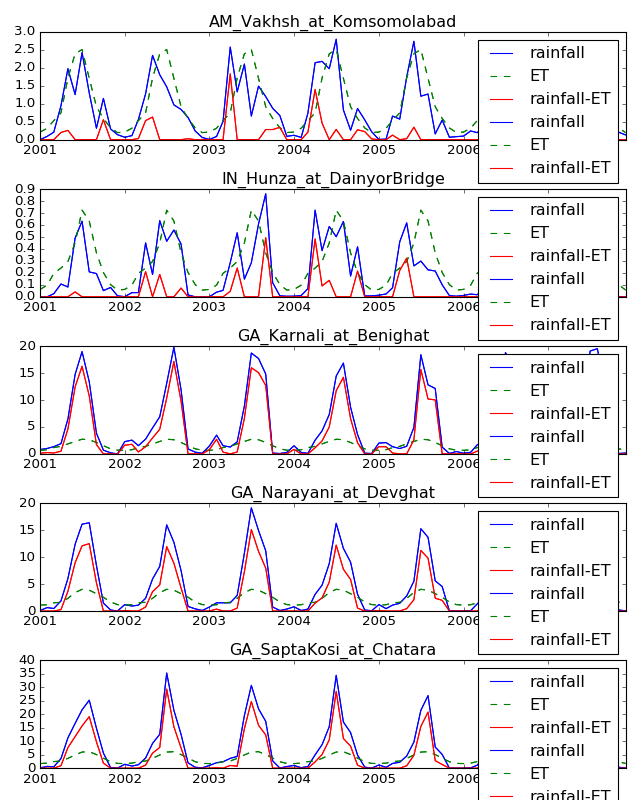

In [3]:
fig, ax = plt.subplots(5,1, figsize=(8,10))

In [7]:
for i, id in enumerate(drainageids):
    rainfallFile = '/Users/brodzik/projects/CHARIS/rainfall/Aphrodite_V1101R2/monthly_by_drainage/' + id + \
        '.APHRODITE_rainfall_km3.monthly.csv'
    ETFile = '/Users/brodzik/projects/CHARIS/evaporation/merra/' + id + '.merra.ET_clim.txt'
    rainfall = TimeSeries(rainfallFile)
    et_df = pd.read_csv(ETFile)
    et_df = et_df.set_index('month')
    for j in rainfall.data.index:
        month = j.month
        rainfall.data.loc[j,'ET_km3'] = et_df.loc[month]['ET_km3']
    new = rainfall.data['rainfall'] - rainfall.data['ET_km3']
    new[new < 0.] = 0.
    rainfall.data['rainfall-ET_km3'] = new
    ax[i].plot(rainfall.data['rainfall'], color='b', label='rainfall')
    ax[i].plot(rainfall.data['ET_km3'], '--', color='g', label='ET')
    ax[i].plot(rainfall.data['rainfall-ET_km3'], color='r', label='rainfall-ET')
    ax[i].set_title(id)
    ax[i].legend()
    newFile = '/Users/brodzik/projects/CHARIS/rainfall/Aphrodite_V1101R2/monthly_by_drainage/' \
        + id + '.APHRODITE_rainfall_adj_merra_ETclim.txt'
    rainfall.write(newFile)
plt.tight_layout()        

In [5]:
plt.savefig('calibration_basins.rainfall-ET.png')

In [8]:
rainfallFile = '/Users/brodzik/projects/CHARIS/rainfall/Aphrodite_V1101R2/monthly_by_drainage/' + id + \
    '.APHRODITE_rainfall_km3.monthly.csv'

In [9]:
rainfall = TimeSeries(rainfallFile)


In [11]:
rainfall.comments()


'# Source for rainfall: APHRODITE V1101R2 0.25x0.25 degree precipitation data\n# Location for rainfall data: /Volumes/CHARIS/rainfall/Aphrodite_V1101R2\n# Source for basins masks: Created by SJSK\n# Location for basin mask data: /projects/CHARIS/basins/basin_MODIS_tiles\n# Coverted from mm/day to km3/month for GA SaptaKosi at Chatara by Karl Rittger on 20-Jun-2016\n# Units: km^3\n# COLUMNS: Year Month Day DOY rainfall'